In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("DLBCL.csv")
print(new_data.shape)
new_data.head()

(79, 7071)


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,DLBCL FL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL


In [3]:
new_data["class"].unique()

array(['DLBCL FL', 'class', 'DLBCL', 'FL'], dtype=object)

In [4]:
new_data["class"].replace({"DLBCL": 1, "FL": 2}, inplace=True)
new_data.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,DLBCL FL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,1
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,1
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,1


In [5]:
df = new_data.iloc[2:,:] # Removes first two tubles

print('Required data set ')
df.head()

Required data set 


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,1
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,1
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,1
5,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,1
6,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,1


In [6]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

In [7]:
feature_set = df.drop('class', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000466_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000895_at', 'AB000896_at', 'AB000897_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002318_at', 'AB002365_at', 'AB002366_at', 'AB002380_at', 'AB002382_at', 'AB002409_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000061_cds3_at', 'AC000062_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC000115_cds1_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002077_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_cds4_at', 'AC002115_rna2_at', 'AC002450_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AD000092_cds2_at', 'AD000684_cds1_at', 'AD001527_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000234_at'

In [8]:
feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [9]:
target_feature = df['class']
target_feature.head()

2    1
3    1
4    1
5    1
6    1
Name: class, dtype: object

In [10]:
temp_feature_set=StandardScaler().fit_transform(feature_set)

In [11]:
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.730817,-0.292937,-0.431595,-0.567503,-0.809531,-0.456305,-0.293827,-0.784873,-0.384965,0.213520,...,-0.469899,-0.282291,0.190071,-0.188077,0.520833,0.141759,0.384881,0.518999,0.206599,0.584699
1,-0.570425,-0.117207,0.149112,0.973353,-0.130132,-0.755853,-0.542402,0.134863,-0.448168,-0.154563,...,-0.355832,3.320297,0.446154,1.934349,0.534848,-0.065095,-0.553796,0.492245,0.059613,0.525299
2,-0.274317,0.560607,-0.299096,-0.669825,1.737265,0.595954,1.903393,0.833021,0.247067,0.303496,...,-0.188533,0.723030,0.285358,0.457126,0.741570,0.205108,0.661544,0.652770,0.576164,0.465899
3,0.922455,0.246804,-0.389065,-0.320725,0.158327,0.012219,-0.382604,-0.136230,0.129690,-0.676015,...,-1.374836,1.321969,0.946409,0.252983,0.356156,-0.579645,0.236669,0.266747,0.194000,0.637111
4,-0.625946,0.140111,-0.413602,-0.916603,-0.042835,-0.375657,1.064455,-0.803441,-0.687438,-0.563545,...,-0.948983,-0.761442,0.553352,-0.120654,0.468276,-0.085781,-0.119040,0.564864,0.538367,0.591687


In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

# Selection of features using F Classification 

In [13]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :428.41190791130066 seconds


In [14]:
selected_features = list(selected_features)

In [15]:
required_features = selected_features[:500]
print('Length of required features : '+str(len(required_features)))

Length of required features : 500


In [16]:
print(required_features)

['U32986_s_at', 'U61234_at', 'X64177_f_at', 'D79990_at', 'L34035_at', 'K03431_cds1_at', 'U08377_at', 'HG4542-HT4947_at', 'X64330_at', 'M17252_at', 'HG4747-HT5195_at', 'U44772_at', 'X89066_at', 'X05153_rna1_at', 'U07806_s_at', 'U69126_s_at', 'HG3088-HT3263_at', 'U86759_s_at', 'U41315_rna1_s_at', 'J03069_rna1_at', 'L22548_at', 'Y09561_at', 'D13627_at', 'HG3543-HT3739_at', 'U79304_at', 'AC002115_rna2_at', 'L02321_at', 'U52960_at', 'X98833_rna1_at', 'X52773_at', 'S65738_at', 'U36221_at', 'X51630_at', 'M73077_at', 'X91809_at', 'X02875_s_at', 'M14676_at', 'L15533_rna1_at', 'X75918_at', 'M29536_at', 'X80915_rna1_at', 'U58048_at', 'L40384_s_at', 'M80783_at', 'U39317_at', 'M96954_s_at', 'D29641_at', 'U52828_s_at', 'D13969_at', 'D86956_at', 'D50917_at', 'U10492_at', 'X85372_at', 'D23662_at', 'D28476_at', 'J03040_at', 'U41815_at', 'U56102_at', 'U63312_at', 'L32866_at', 'M16405_at', 'X05299_at', 'X72755_at', 'U80987_s_at', 'M22490_at', 'M95623_cds1_at', 'M81780_cds5_at', 'U62962_at', 'U62433_at', 

In [17]:
X_train = X_train[required_features]
X_train.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,L41268_f_at,L21936_at,M21574_at,L34357_at,X71874_cds1_at,M96843_at,X13930_f_at,HG1612-HT1612_at,X51362_s_at,U28150_at
22,-0.539283,1.542732,-0.423592,-0.119216,-0.078018,-0.899698,-1.179589,1.540306,0.300000,0.803101,...,-0.737024,-0.474797,-0.306801,0.131231,-1.206378,0.586337,-0.562261,-0.731683,-0.396652,-0.422525
41,0.018010,-0.185466,-0.138460,0.098561,1.217441,-0.840833,-0.136123,0.271656,0.938595,1.046743,...,-0.320325,-0.076330,0.344149,-0.536887,-0.422218,-0.281131,-1.362042,-0.251512,-0.252779,-1.184175
50,0.635320,-0.421432,0.685376,0.885760,0.226796,-0.372366,0.072570,0.610117,0.080078,0.501448,...,-0.652798,-0.036240,1.453514,-0.059660,-0.306879,-0.259114,-0.104267,-0.517774,-0.275387,0.274985
38,-0.437470,-0.404815,0.329053,0.312566,-1.716393,0.694563,-1.839741,-2.669815,0.451710,-2.964656,...,2.849248,-0.166228,-1.886805,1.089834,0.525964,-0.448459,2.500147,-0.784036,-1.477754,-0.157952
61,-0.746125,-0.451343,-0.816611,-1.167558,-3.926293,1.582443,-2.516929,-0.983785,-0.997183,0.298413,...,1.390801,-0.533109,-1.358100,0.077283,-0.859610,-0.474880,0.446009,-0.803950,1.338045,2.022770


In [18]:
X_test = X_test[required_features]
X_test.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,L41268_f_at,L21936_at,M21574_at,L34357_at,X71874_cds1_at,M96843_at,X13930_f_at,HG1612-HT1612_at,X51362_s_at,U28150_at
48,-0.149178,-0.823570,-0.177725,-0.356790,0.493508,-0.801590,0.017202,1.374213,0.537562,0.704484,...,-0.945374,0.008709,0.228017,-0.034761,-0.222246,-0.695049,-1.341535,-0.623444,-0.550801,-0.013640
74,-0.782564,0.532401,-0.335153,0.045766,0.569712,-0.678954,-1.294584,1.244772,-0.867818,0.724787,...,-1.184754,-0.417699,-0.147884,-1.234053,1.288403,0.489462,-0.538336,-0.852449,-0.345268,0.475419
59,-1.216610,-0.265229,-0.476068,-0.719750,0.734819,0.383069,-0.804794,0.565869,-0.538524,-1.752244,...,1.045029,-0.564695,-0.630748,-0.341846,-0.773480,-0.333971,0.087133,-0.179246,0.361764,-0.077779
54,1.335153,-0.531106,-0.291117,0.578423,1.115837,-0.791779,0.668836,0.335056,0.629294,0.652275,...,-0.697128,0.523801,1.597150,0.264024,-0.682107,-0.439653,-0.828855,0.069672,-0.361711,-0.366404
34,-0.182401,-0.683985,-0.003050,0.625560,-0.293928,2.092607,-1.298843,-0.361018,-0.019886,1.391904,...,4.937176,-0.542828,-1.251136,-0.080409,0.185936,-1.553710,2.004556,-0.876537,-0.649457,0.347141


In [19]:
y_train.shape, y_test.shape

((61,), (16,))

# Sequential Forward Search

In [20]:
forward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 100,
                                             forward= True,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.5s finished
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:611: RuntimeWarning: Mean of empty slice
  all_avg_scores.append(np.nanmean(cv_scores))

[2020-10-20 17:13:23] Features: 1/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.4s finished

[2020-10-20 17:13:25] Features: 2/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.4s finished

[2020-10-20 17:13:26] Features: 3/100 -- score: nan[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    2.7s finished

[2020-10-20 17:14:41] Features: 32/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    2.5s finished

[2020-10-20 17:14:44] Features: 33/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    2.7s finished

[2020-10-20 17:14:47] Features: 34/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed:    2.9s finished

[2020-10-20 17:14:50] Features: 35/100 -- score: nan[Parallel(n_jobs=-1)]: Using

[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 439 out of 439 | elapsed:    4.7s finished

[2020-10-20 17:16:45] Features: 62/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 438 out of 438 | elapsed:    5.5s finished

[2020-10-20 17:16:51] Features: 63/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:    6.7s finished

[2020-10-20 17:16:57] Features: 64/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:    5.2s finished

[2020-10-20 17:17:

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 406 out of 413 | elapsed:   10.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 413 out of 413 | elapsed:   10.9s finished

[2020-10-20 17:20:29] Features: 88/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 412 out of 412 | elapsed:   11.1s finished

[2020-10-20 17:20:41] Features: 89/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 404 out of 411 | elapsed:   11.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 411 out of 411 | elapsed:   11.2s finished

[2020-10-20 17:20:52] Features: 90/100 -- score: nan[Par

In [21]:
print('Time taken by Forward Feature Selection is :'+str(int(time.time() - forward_start_time))+' seconds')

Time taken by Forward Feature Selection is :576 seconds


In [22]:
feature_selector.k_feature_names_

('U32986_s_at',
 'U61234_at',
 'X64177_f_at',
 'D79990_at',
 'L34035_at',
 'K03431_cds1_at',
 'U08377_at',
 'HG4542-HT4947_at',
 'X64330_at',
 'M17252_at',
 'HG4747-HT5195_at',
 'U44772_at',
 'X89066_at',
 'X05153_rna1_at',
 'U07806_s_at',
 'U69126_s_at',
 'HG3088-HT3263_at',
 'U86759_s_at',
 'U41315_rna1_s_at',
 'J03069_rna1_at',
 'L22548_at',
 'Y09561_at',
 'D13627_at',
 'HG3543-HT3739_at',
 'U79304_at',
 'AC002115_rna2_at',
 'L02321_at',
 'U52960_at',
 'X98833_rna1_at',
 'X52773_at',
 'S65738_at',
 'U36221_at',
 'X51630_at',
 'M73077_at',
 'X91809_at',
 'X02875_s_at',
 'M14676_at',
 'L15533_rna1_at',
 'X75918_at',
 'M29536_at',
 'X80915_rna1_at',
 'U58048_at',
 'L40384_s_at',
 'M80783_at',
 'U39317_at',
 'M96954_s_at',
 'D29641_at',
 'U52828_s_at',
 'D13969_at',
 'D86956_at',
 'D50917_at',
 'U10492_at',
 'X85372_at',
 'D23662_at',
 'D28476_at',
 'J03040_at',
 'U41815_at',
 'U56102_at',
 'U63312_at',
 'L32866_at',
 'M16405_at',
 'X05299_at',
 'X72755_at',
 'U80987_s_at',
 'M22490_at'

In [23]:
feature_columns = list(feature_selector.k_feature_idx_)

In [24]:
X_train2=X_train.iloc[:, feature_columns]
X_train2.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,U03735_f_at,X95152_rna1_at,L14856_at,X56681_s_at,K03498_xpt1_s_at,X64229_at,X57206_at,X07618_s_at,U12140_at,Z29331_at
22,-0.539283,1.542732,-0.423592,-0.119216,-0.078018,-0.899698,-1.179589,1.540306,0.300000,0.803101,...,0.567576,1.313049,-0.749023,-1.282283,-0.775845,0.420695,-0.575129,-0.371527,-0.636210,0.106564
41,0.018010,-0.185466,-0.138460,0.098561,1.217441,-0.840833,-0.136123,0.271656,0.938595,1.046743,...,-0.743214,-0.991528,0.323619,-0.652768,-0.648290,0.162363,-0.347475,-1.111934,-1.026472,-0.969456
50,0.635320,-0.421432,0.685376,0.885760,0.226796,-0.372366,0.072570,0.610117,0.080078,0.501448,...,0.476295,0.217804,-0.597234,1.553240,1.703157,-0.297858,-0.784858,-0.159982,0.096387,0.455218
38,-0.437470,-0.404815,0.329053,0.312566,-1.716393,0.694563,-1.839741,-2.669815,0.451710,-2.964656,...,1.009374,2.324628,-1.146204,2.483199,-0.731478,-1.075025,-0.494464,0.175394,2.670749,-0.302203
61,-0.746125,-0.451343,-0.816611,-1.167558,-3.926293,1.582443,-2.516929,-0.983785,-0.997183,0.298413,...,-1.860489,-2.147619,-0.235470,-0.691452,-1.119689,-1.129297,-0.555411,0.172814,2.396880,-0.644846


In [25]:
X_test2=X_test.iloc[:, feature_columns]
X_test2.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,U03735_f_at,X95152_rna1_at,L14856_at,X56681_s_at,K03498_xpt1_s_at,X64229_at,X57206_at,X07618_s_at,U12140_at,Z29331_at
48,-0.149178,-0.823570,-0.177725,-0.356790,0.493508,-0.801590,0.017202,1.374213,0.537562,0.704484,...,0.021718,0.042869,-0.693367,0.382668,-0.548465,-0.786301,-0.527627,-0.379266,-1.101786,0.040440
74,-0.782564,0.532401,-0.335153,0.045766,0.569712,-0.678954,-1.294584,1.244772,-0.867818,0.724787,...,-1.159454,-1.303368,-0.989355,-0.058585,-0.942221,0.160192,-0.244404,-0.335410,-0.595130,-0.488553
59,-1.216610,-0.265229,-0.476068,-0.719750,0.734819,0.383069,-0.804794,0.565869,-0.538524,-1.752244,...,0.859674,0.894726,-0.566876,-0.559153,-1.058684,-0.438964,-0.679993,-1.568561,0.863218,0.094541
54,1.335153,-0.531106,-0.291117,0.578423,1.115837,-0.791779,0.668836,0.335056,0.629294,0.652275,...,0.335723,1.777006,-0.336663,-0.327051,-0.382089,1.167470,0.030753,0.260528,-0.595130,1.086402
34,-0.182401,-0.683985,-0.003050,0.625560,-0.293928,2.092607,-1.298843,-0.361018,-0.019886,1.391904,...,0.116650,-1.615209,2.233631,-0.443618,-0.598377,-1.200935,-1.106620,-0.239956,1.636896,-0.795128


In [26]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 3 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 3 2 2]
[2 3 3 2 2 2 3 2 2 3 2 3 2 2 2 2]


# KNN Classifier

In [27]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 75.0000
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.8033
Testing accuracy on selected features for 2 neighbors: 93.7500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.8033
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 90.1639
Testing accuracy on selected features for 4 neighbors: 93.7500
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.8033
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 85.2459
Testing accuracy on selected features for 6 neighbors: 81.2500
KNN Classfier for 7 neighbors:
Training accuracy on

In [28]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 1  4]]
Average Confusion matrix is : [[10.68421053  0.31578947]
 [ 3.26315789  1.73684211]]


Confusion Matrix of KNN Classifier:


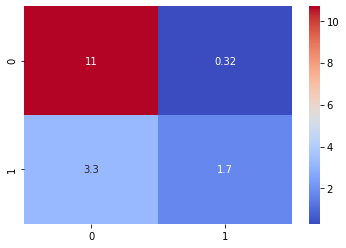

In [29]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [30]:
f_score_knn = f1_score(y_test2, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.7763157894736842


# SVM(Support Vector Machine)

In [31]:
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 86.8852
Testing accuracy on selected features: 68.7500


In [32]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print(cm_svc)

[[11  0]
 [ 5  0]]


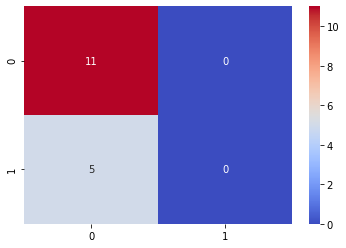

In [33]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [34]:
f_score_knn = f1_score(y_test2, y_test_prediction_svc,average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.6875


# Backward Feature Selection

In [35]:
backward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 400,
                                             forward= False,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'unknown'

  FitFailedWarning)
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:422: RuntimeWarning: Mean of emp

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 479 out of 479 | elapsed:   41.1s finished

[2020-10-20 17:28:26] Features: 478/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 478 out of 478 | elapsed:   42.1s finished

[2020-10-20 17:29:09] Features: 477/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 470 out of 477 | elapsed:   23.0s remaining:    0.2s
[Parallel(n_jobs=-1)]

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   53.6s
[Parallel(n_jobs=-1)]: Done 457 out of 457 | elapsed:  1.2min finished

[2020-10-20 17:44:09] Features: 456/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 456 out of 456 | elapsed:  1.3min finished

[2020-10-20 17:45:27] Features: 455/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 455 out of 455 | elapsed:   40.4s finished

[2020-10-20 17:46:08] Features: 454/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend Lo

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 434 out of 434 | elapsed:   52.7s finished

[2020-10-20 17:54:57] Features: 433/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 426 out of 433 | elapsed:   27.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 433 out of 433 | elapsed:   27.6s finished

[2020-10-20 17:55:25] Features: 432/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   28.2s finished

[2020-10-20

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 412 out of 412 | elapsed:   20.0s finished

[2020-10-20 18:08:13] Features: 411/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 411 out of 411 | elapsed:   37.8s finished

[2020-10-20 18:08:50] Features: 410/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 410 out of 410 | elapsed:   20.3s finished

[2020-10-20 18:09:11] Features: 409/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend Lo

In [36]:
print('Time taken by Backward Feature Selection is :'+str(int(time.time() - backward_start_time))+' seconds')

Time taken by Backward Feature Selection is :3047 seconds


In [37]:
feature_selector.k_feature_names_

('U32986_s_at',
 'U61234_at',
 'X64177_f_at',
 'D79990_at',
 'L34035_at',
 'K03431_cds1_at',
 'U08377_at',
 'HG4542-HT4947_at',
 'X64330_at',
 'M17252_at',
 'HG4747-HT5195_at',
 'U44772_at',
 'X89066_at',
 'X05153_rna1_at',
 'U07806_s_at',
 'U69126_s_at',
 'HG3088-HT3263_at',
 'U86759_s_at',
 'U41315_rna1_s_at',
 'J03069_rna1_at',
 'L22548_at',
 'Y09561_at',
 'D13627_at',
 'HG3543-HT3739_at',
 'U79304_at',
 'AC002115_rna2_at',
 'L02321_at',
 'U52960_at',
 'X98833_rna1_at',
 'X52773_at',
 'S65738_at',
 'U36221_at',
 'X51630_at',
 'M73077_at',
 'X91809_at',
 'X02875_s_at',
 'M14676_at',
 'L15533_rna1_at',
 'X75918_at',
 'M29536_at',
 'X80915_rna1_at',
 'U58048_at',
 'L40384_s_at',
 'M80783_at',
 'U39317_at',
 'M96954_s_at',
 'D29641_at',
 'U52828_s_at',
 'D13969_at',
 'D86956_at',
 'D50917_at',
 'U10492_at',
 'X85372_at',
 'D23662_at',
 'D28476_at',
 'J03040_at',
 'U41815_at',
 'U56102_at',
 'U63312_at',
 'L32866_at',
 'M16405_at',
 'X05299_at',
 'X72755_at',
 'U80987_s_at',
 'M22490_at'

In [38]:
feature_columns = list(feature_selector.k_feature_idx_)
print(feature_columns)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [39]:
X_train3=X_train.iloc[:, feature_columns]
X_train3.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,HG2706-HT2802_at,HG4321-HT4591_at,Y10936_at,HG3431-HT3616_s_at,X94910_at,U14970_at,U79285_at,X91220_at,D88213_at,S68616_at
22,-0.539283,1.542732,-0.423592,-0.119216,-0.078018,-0.899698,-1.179589,1.540306,0.300000,0.803101,...,0.775907,0.379425,-0.800069,-0.218556,0.239281,0.845379,-0.568634,-0.215825,-0.771531,-1.124979
41,0.018010,-0.185466,-0.138460,0.098561,1.217441,-0.840833,-0.136123,0.271656,0.938595,1.046743,...,0.074041,-2.948755,-0.732967,0.781521,2.446500,0.636059,0.216151,-0.742354,-0.893357,-0.911957
50,0.635320,-0.421432,0.685376,0.885760,0.226796,-0.372366,0.072570,0.610117,0.080078,0.501448,...,0.074041,0.718266,-0.842770,0.681303,-0.976104,-0.753005,-1.366646,2.653754,0.581615,0.144048
38,-0.437470,-0.404815,0.329053,0.312566,-1.716393,0.694563,-1.839741,-2.669815,0.451710,-2.964656,...,-2.499471,0.740856,0.316257,-0.420576,-2.964016,-2.718606,0.370463,1.034679,2.770143,3.348477
61,-0.746125,-0.451343,-0.816611,-1.167558,-3.926293,1.582443,-2.516929,-0.983785,-0.997183,0.298413,...,-0.997230,-1.164188,3.662183,-0.591476,-2.376839,-0.956137,-0.647995,0.080347,2.304591,1.433102


In [40]:
X_test3=X_test.iloc[:, feature_columns]
X_test3.head()

,U32986_s_at,U61234_at,X64177_f_at,D79990_at,L34035_at,K03431_cds1_at,U08377_at,HG4542-HT4947_at,X64330_at,M17252_at,...,HG2706-HT2802_at,HG4321-HT4591_at,Y10936_at,HG3431-HT3616_s_at,X94910_at,U14970_at,U79285_at,X91220_at,D88213_at,S68616_at
48,-0.149178,-0.823570,-0.177725,-0.356790,0.493508,-0.801590,0.017202,1.374213,0.537562,0.704484,...,-0.270736,-0.622041,-0.781769,0.517788,1.406560,1.570424,-0.559816,-0.834496,-1.045641,-0.906495
74,-0.782564,0.532401,-0.335153,0.045766,0.569712,-0.678954,-1.294584,1.244772,-0.867818,0.724787,...,0.295683,-3.479607,0.712766,-0.614157,1.415049,1.198940,-0.537772,0.139581,-0.588791,-0.609721
59,-1.216610,-0.265229,-0.476068,-0.719750,0.734819,0.383069,-0.804794,0.565869,-0.538524,-1.752244,...,-0.947976,0.846273,0.355907,-0.067173,-0.721425,-0.039909,-0.687675,0.218561,0.768706,0.395304
54,1.335153,-0.531106,-0.291117,0.578423,1.115837,-0.791779,0.668836,0.335056,0.629294,0.652275,...,0.529638,0.725796,-0.452361,2.675129,0.399163,1.176109,1.291924,-0.090775,-0.619248,-0.802715
34,-0.182401,-0.683985,-0.003050,0.625560,-0.293928,2.092607,-1.298843,-0.361018,-0.019886,1.391904,...,-0.086034,-0.622041,2.121898,-0.673761,-1.772684,-2.329412,0.220560,0.606875,4.393047,1.480440


In [41]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test3 = np.array([a+1 for a in y_test])

print(y_test2)

[2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 3 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 3 2 2]
[2 3 3 2 2 2 3 2 2 3 2 3 2 2 2 2]


# KNN Classifier

In [42]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 81.2500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 93.4426
Testing accuracy on selected features for 2 neighbors: 93.7500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 95.0820
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 96.7213
Testing accuracy on selected features for 4 neighbors: 87.5000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 95.0820
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 91.8033
Testing accuracy on selected features for 6 neighbors: 75.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [43]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 1  4]]
Average Confusion matrix is : [[10.52631579  0.47368421]
 [ 3.31578947  1.68421053]]


Confusion Matrix of KNN Classifier:


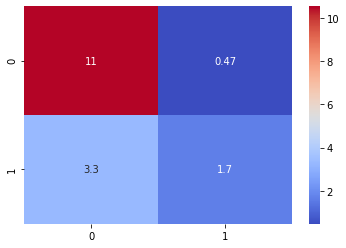

In [44]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [45]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.7631578947368421


# SVM(Support Vector Machine)

In [46]:
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 93.4426
Testing accuracy on selected features: 68.7500


In [47]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print(cm_svc)

[[11  0]
 [ 5  0]]


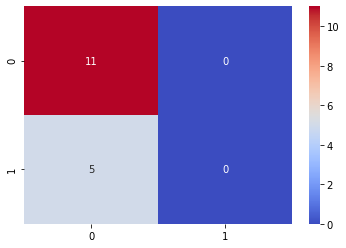

In [48]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [49]:
f_score_knn = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.6875
